<a href="https://colab.research.google.com/github/msilver22/Hopfield_model/blob/main/HopfieldNetwork_audioRetrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab delves into the **Hopfield Model** as an Associative memory.


---


The exploration begins with an overview of the model's properties, incorporating insights from biology and mechanical statistics to deepen our understanding. Focusing on **Audio Retrieval**, the code shows the Hopfield model's associative memory capabilities.

In particular, the network will be trained to retrieve different audio-patterns.

[Github repository](https://github.com/msilver22/Hopfield_model)

---



# From Biological to Artificial Neurons




A **neuron**, the fundamental building block of our nervous system, consists of three main parts: the *dendrites*, the *cell body* and the *axon*. The **action potential** is a neuronal phenomenon in which we see the neuron fires. Transmission of a neuronal signal is entirely dependent of the movement of ions that are unequally distributed between the inside and the outside of the cell body, and this a electro-chemical gradient across the membrane. Depending on how this gradient varies in response to certain stimuli, the neuron can either start the process leading to the production of an electrical signal or remain in the resting state. This behavior implies two basic concepts on which mathematical methods for neural networks are based on:
*   Cognitive capacity does not depend on any intensity, but only on *binary values* (and more specifically, by frequency).
*   There should exists a *threshold* of the network that allows to activate or not neurons.

 Let's consider a network with $N$ neurons $S_1 ... S_N$; we denote with $J_{ij}$ the synaptic weight between the neurons $S_i$ and $S_j$.
 Since the network is not feed-forward, we are interested in expressing the state of each individual neuron as a function of time $t$. More specifically, if we assume that we know the neuron states $S_1(t) ... S_N(t)$, then the behavior of $i$-th neuron can be expressed by the equation
 \begin{equation}
        S_i(t + \Delta t ) = \Theta \left( \sum_{k=1}^{N} J_{ik}  S_k(t) - U_i^{*}\right)
 \end{equation}
 where $U_i^{*}$ is the threshold of the neuron $S_i$ and $\Theta$ is the *Heaviside function*. However, this modeling turns out to be a bit unrealistic, as it does not take into account the fact that the neuron's threshold could vary over time. Indeed, we consider the **Stochastic Neurons**
 \begin{equation}
    \left\{
    \begin{aligned}
        U_i^{*} (t) &= U_i^{*} - \dfrac{T}{2} z_i(t) \\
        S_i(t + &\Delta t ) = \Theta \left( \sum_{k=1}^{N} J_{ik}  S_k(t) - U_i^{*}(t) \right)
    \end{aligned}
    \right.
 \end{equation}
 with the *noise term* such that $\mathbb{E}\left(z_i(t)\right) = 0$ and $\mathbb{E}\left(z_i(t)^2\right) = 1$; the *temperature* $T$ is a very important control parameter, which plays a central role in the computational and convergence properties of the Hopfield model. A second convenient traslation is to redefine neurons such that they have values in $\{+1,-1\}$, so called **Ising Neurons**
 \begin{equation}
    \left\{
    \begin{aligned}
        \sigma_i&(t) = 2 S_i(t) - 1 \\
        U_i^{*} &= \frac{1}{2} \left( \sum_{k=1}^N J_{ik} - h_i \right)
    \end{aligned}
    \right.
 \end{equation}
 where $\sigma_i(t) \in \{-1,+1\}$ and $\{h_i\}_{i=1}^N$ are the biases. Let's denote the *local field* acting on the neuron $\sigma_i$ as  
 \begin{equation*}
        \varphi_i(t) := \sum_{k=1}^N J_{ik} \sigma_k(t) + h_i
 \end{equation*}
 After some simple calculations, we obtain the **generic formula**
 \begin{equation}
        \sigma_i(t + \Delta t ) = \operatorname{sgn}\left(\varphi_i(t) + T z_i(t)\right)
 \end{equation}
 with $\operatorname{sgn}(x) = 2 \Theta(x) -1$; this will be the notation we will use as the article continues. The probability to find a neuron state $\sigma_i(t + \Delta t )$ can be expressed in terms of the noise distribution $\mathcal{P}(z)$; in the case of *symmetric distribution*, we have
 \begin{equation}
        \mathbb{P} \left( \sigma_i(t + \Delta t ) = \pm 1 \right) = g \left( \pm \dfrac{\varphi_i(t)}{T} \right) \equiv
        \int_{-\infty}^{\pm \dfrac{\varphi_i(t)}{T}}
        \mathcal{P}(z)\,dz
 \end{equation}
 where $g$ is the *cumulative distribution function*. A natural choice is to consider the distribution of a Standard Gaussian, whose associated *cdf* is $g(x) = \frac{1}{2} ( 1 + \operatorname{erf}(\dfrac{x}{\sqrt{2}}))$. However, our plausible and equivalent choice shall be
 \begin{equation}
    \left\{
    \begin{aligned}
        \mathcal{P}(z) &= \frac{1}{2} ( 1 - \operatorname{tanh}^2(z)) \\
        g(z) &= \frac{1}{2} ( 1 + \operatorname{tanh}(z) )
    \end{aligned}
    \right.
 \end{equation}
 Notice that $T$  controls the impact of the noise on the model; in fact, if $T=0$ then the process is deterministic, while if $T \rightarrow \infty$ then  \begin{equation}
        \mathbb{P} \left( \sigma_i(t + \Delta t ) = \pm 1 \right) = g (0) = \frac{1}{2}
 \end{equation}
 that is, the process is fully-random. If we assume $T \neq 0$, we can see that the microscopic laws governing the *spin vector* $ \mathbf{\sigma} = (\sigma_1 ... \sigma_N)$ are defined as a stochastic alignment to the local field $\mathbf{\varphi} = (\varphi_1(\mathbf{\sigma}) ... \varphi_N(\mathbf{\sigma}))$; as a matter of fact, if $\varphi_1(\mathbf{\sigma}) > 0$ then $\mathbb{P} \left( \sigma_1(t + \Delta t ) =  1 \right) > \frac{1}{2} $, while if $\varphi_1(\mathbf{\sigma}) < 0$ then $\mathbb{P} \left( \sigma_1(t + \Delta t ) =  1 \right) < \frac{1}{2}$.



Now we focus on noiseless dynamics, which can be divided into two types:

*   **Parallel dynamics**, represented by
\begin{equation}
        \sigma_i(t + \Delta t ) = \operatorname{sgn}\left(\sum_{k=1}^N J_{ik} \sigma_k(t) + h_i\right) \quad \forall i \in \{1..N\}
    \end{equation}
*   **Sequential dynamics**,represented by
\begin{equation}
        \left\{
        \begin{aligned}
            &\text{choose randomly  } i \text{  in } \{1..N\} \\
            &\sigma_i(t + \Delta t ) = \operatorname{sgn}\left(\sum_{k=1}^N J_{ik} \sigma_k(t) + h_i\right)
        \end{aligned}
        \right.
\end{equation}

Therefore, starting from an initial configuration $\sigma(0)$, the following sequence is obtained
\begin{equation}
        \sigma(0) \rightarrow \sigma(1) \rightarrow \sigma(2) \rightarrow \text{...}
\end{equation}
and we are hopeful that the sequence tends towards an *attractor* $\sigma^{*}$ or in a limit cycle. Parallel dynamics and sequential dynamics (with some improvements) always evolve into an attractor, that is a limit cycle of period less than or equal to $2^N$. However, we will focus on sequential dynamics since it is evident that, for very large $N$, parallel dynamics turns out to be very expensive from a computational point of view.

*Proposition*:
Let's consider a noiseless sequential dynamic that has the following properties:


*   Symmetric interactions, i.e. $J_{ik} = J_{ki} \ \ \forall i,k \in \{1...N\}$
*   Non-negative interactions, i.e. $J_{ii} \geq 0 \ \forall i \in \{1...N\}$
*   Stationary external field $h = (h_1,...,h_N)$

Then the function
\begin{equation}
        L(\sigma; N, J, h) := -\frac{1}{2} \sum_{k,l=1}^N \sigma_k J_{kl} \sigma_j - \sum_{k=1}^N h_k \sigma_k
\end{equation}
is a *Ljapunov function* with respect to the dynamic written above.


---
# Curie-Weiss model

Let us now turn our attention to a very simple neural network model, the Curie-Weiss model. This model can be described as a system made of $N$ spins $\sigma_{i} \in \{-1,+1\}$  that can interact pairwise and with an external field according to the Hamiltonian
\begin{equation*}
	 \mathcal{H}_{N,J,h}(\sigma) = -  \sum_{(i,j)} \sigma_{i} J_{ij} \sigma_{j}  - \sum_{i=1}^{N} h_{i} \sigma_{i}
\end{equation*}
We shall consider a homogenous coupling, i.e. $J_{ij} = \frac{J}{N}$ with $J$ constant, and homogeneous external field, i.e.  $h_{i} = h \ \forall i=1...N$. The *order parameter* of the model is the empirical **Magnetization**
\begin{equation}
	m_{N}(\sigma) = \dfrac{1}{N} \sum_{i=1}^{N} \sigma_{i}
\end{equation}
which expresses the percentage of spin pointing upwards or downwards. In fact, if $m=1$ then there is all positive spin while if $m=-1$ all negative spin. In fact, we can rewrite the Hamiltonian as a function of $m$ as follows
\begin{equation}
	 \mathcal{H}_{N,J,h}(\sigma) = - \dfrac {J}{N} \sum_{i>j} \sum_{j} \sigma_{i} \sigma_{j} - h \sum_{i} \sigma_{i} = - \dfrac {NJ}{2} (m_{N}(\sigma))^{2} - hN m_{N}(\sigma) + \dfrac{J}{2}
\end{equation}
where the last term is the diagonal element that we added to introduce $m$ and therefore we have to subtract it; clearly this term will be left out as it does not affect the minimisation process. This is the reason why we refer to these models as *mean-field models*.

Using Laplace's method and coarse-grained approximation, we obtain explicit formula for the **intensive free energy** in TDL given by
\begin{equation}
	f(m) = -\dfrac{J}{2} m^{2} - hm + T \left[ \dfrac{1+m}{2} \log( \frac{1+m}{2}) + \dfrac{1-m}{2} \log( \frac{1-m}{2} ) \right]
\end{equation}
where the first two addends correspond to the energy contribution, while the third addend is the entropy contribution governed by the control parameter $T$.  We observe that if $J$ is less than zero, i.e. we are in the presence of *paramagnetic* material, the coarse-grained free energy has a single minimum at $m=0$. Whereas if J is greater than zero, i.e. there is *ferromagnetic* behaviour, then the minimum points vary as the temperature varies. This is a direct consequence of the fact that
\begin{equation}
	f'(m) = 0 \implies J m^{*} \beta + \beta h = \operatorname{atanh}(m^{*}) = 0 \implies m^{*} = \tanh ( \beta(Jm^{*}+h))
\end{equation}
so the minima correspond to the solutions of the **Self-Consistency equatio**n which clearly vary as $\beta$ varies.


Text(0.5, 1.0, 'Intensive Free Energy')

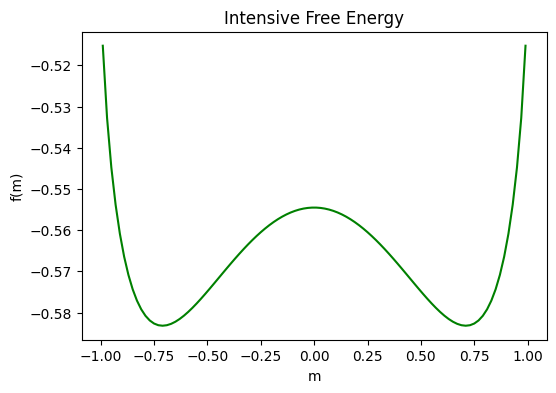

In [ ]:
#Plot of the free energy

import matplotlib.pyplot as plt
import numpy as np

#parameters
J = 1
T = 0.8
h = 0

def free_energy_CW(m, J, h, T):
    return -J/2 * m**2 - h*m + T*((1+m)/2 * np.log((1+m)/2) + (1-m)/2 * np.log((1-m)/2))

x_values = np.linspace(-0.99, 0.99, 100)
y_values = free_energy_CW(x_values,J,h,T)
plt.figure(figsize=(6, 4))
plt.xlabel('m')
plt.ylabel('f(m)')
plt.plot(x_values, y_values,color='green')
plt.title("Intensive Free Energy")

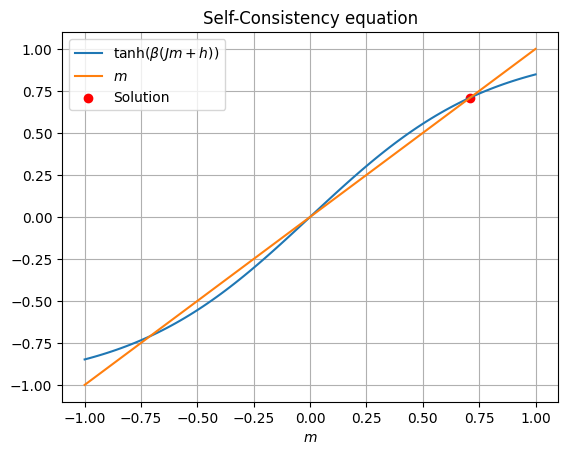

In [ ]:
#solution of the Self-Consistency equation

import numpy as np
import matplotlib.pyplot as plt

#parameters
T = 0.8
b = 1/T
h = 0
J = 1

m_values = np.linspace(-1, 1, 100)
tanh_values = np.tanh(b * (J*m_values + h))
plt.plot(m_values, tanh_values, label=r'$\tanh(\beta(Jm + h))$')
plt.plot(m_values, m_values, label=r'$m$')
plt.xlabel(r'$m$')


def CW_selfcons(b,J,h,m_init):
    m = m_init
    while True:
        m_n = np.tanh(b*(J*m+h))
        if abs(m - m_n) < 1e-10:
            break
        m = m_n
    return m

solution = CW_selfcons(b,J,h,0.2)
plt.scatter(solution, np.tanh(b * (J*solution + h)), color='red', label='Solution')
plt.grid(True)
plt.title("Self-Consistency equation")
plt.legend()


Text(0.5, 1.0, 'Magnetization of CW')

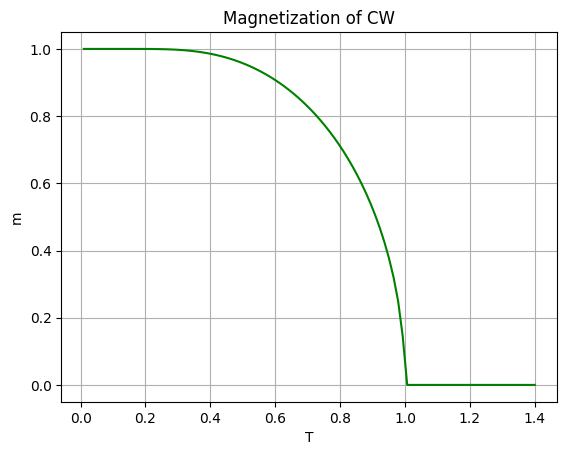

In [ ]:
#Plot of the magnetization as T varies

import numpy as np
import matplotlib.pyplot as plt

#parameters
T = np.linspace(0.01,1.4,100)
J = 1

def CW_selfcons(b,J,h,m_init):
    m = m_init
    while True:
        m_n = np.tanh(b*J*m)
        if abs(m - m_n) < 1e-10:
            break
        m = m_n
    return m

solution_m = np.zeros(len(T))
for t in range(len(T)):
  solution_m[t] = CW_selfcons(1/T[t],J,h,1)

m_values = np.linspace(-1, 1, 100)
plt.plot(T, solution_m,color = 'green')
plt.xlabel('T')
plt.ylabel('m')
plt.grid(True)
plt.title("Magnetization of CW")

---

---
# Hopfield model

Let us now analyse a more complex model. We want to obtain a neural network consisting of $N$ neurons, which is characterised by a cost function representing $P$ local minima at the patterns that we want to store in the network. Indeed, let us consider the patterns
\begin{equation*}
	\xi^{\mu} = (\xi_{1}^{\mu},...,\xi_{N}^{\mu}) \in \{-1,+1\}^{N} \ \ \forall \mu = 1...P.
\end{equation*}
Let us consider the standard Hamiltonian, where now Hebb's rule is given by
\begin{equation}
	J_{ij} = \sum_{\mu=1}^{P} \dfrac{\xi_{i}^{\mu} \xi_{j}^{\mu}}{N} \ \ \forall i,j=1...N.
\end{equation}
As we did for the Curie-Weiss model, we rewrite the Hamiltonian as a function of magnetization. In this case, however, we do not use the average magnetization but the so-called **Mattis Magnetization** expressed by
\begin{equation}
	m_{N,\mu} (\sigma;\xi) = \frac{1}{N} \sum_{i=1}^{N} \xi_{i}^{\mu} \sigma_{i} \ \  \forall \mu = 1...P
\end{equation}
i.e. the vector $(m_{N,1},...,m_{N,P})$. We observe that $m$ represents the percentage of equal spins between the $\sigma$ configuration and the $\xi^{\mu}$ pattern; indeed, if $m_{N,\mu} (\sigma) = 1$ this means that the configuration is exactly identical to the stored pattern. If we assume that we have no external field, then we get
\begin{equation}
	\mathcal{H}_{N,P,\xi} (\sigma) = -\frac {1}{2} \sum_{(i,j)} \sum_{\mu=1}^{P}  \dfrac{\xi_{i}^{\mu} \xi_{j}^{\mu}}{N} \sigma_{i} \sigma_{j}
	=  -\frac {N}{2}   \sum_{\mu=1}^{P} (m_{N,\mu} (\sigma))^{2} + \dfrac{P}{2}
\end{equation}
where the second addend, which we shall ignore, is linked to the diagonal term. In the remainder of the chapter, we will analyse the solution of the Hopfield model in two separate cases:


*   *Low-load* regime, where $P$ is finite (will be the case we will implement after)
*   *High-load* regime, where $P \propto N$ and $\lim_{N \to \infty} \dfrac{P}{N} > 0$



---



**LOW-LOAD REGIME**

Using Laplace's method, we want to obtain an explicit expression for the free energy. In more detail, we analyse the so-called *Quenched Intensive Free-energy*
\begin{equation}
	f_{N,\beta,J} ^{Q} = -\dfrac{1}{\beta N} \mathbb{E}[ \log Z_{N,\beta,\xi}]
\end{equation}
where the average is a *quenched average* over possible realisations of patterns given by
\begin{equation}
	\mathbb{E}[ \ \cdot \ ] = 2^{-NP} \sum_{\xi \in \{-1,+1\}^{N \times P} } [ \ \cdot  \ ]
\end{equation}
although, to lighten the notation, we will avoid emphasising that all the functions we are now going to calculate are quenched. We observe that the partition function can be written as
\begin{equation}
	Z_{N,\beta,\xi} = \sum_{\sigma} \exp ( \dfrac{\beta}{2N} \sum_{i,j,\mu} \xi_{i}^{\mu} \xi_{j}^{\mu} \sigma_{i}  \sigma_{j}) = \sum_{\sigma} \int \left[ \prod_{\mu=1}^{P} dm_{\mu} \delta(m_{\mu} - \sum_{i} \dfrac{\xi_{i}^{\mu} \sigma_{i}}{N}) \right] \exp( \dfrac{\beta N}{2} \sum_{\mu=1}^{P} m_{\mu}^{2})
\end{equation}
\begin{equation}
	= \sum_{\sigma} \int \int \left(  \prod_{\mu=1}^{P} dm_{\mu} \dfrac{N}{2\pi} d\tilde{m}_{\mu} \right) \exp \left( iN \sum_{\mu} \tilde{m}_{\mu} m_{\mu} - i \sum_{j,\mu} \tilde{m}_{\mu} \xi_{j}^{\mu} \sigma_{j} +  \dfrac{\beta N}{2} \sum_{\mu} m_{\mu}^{2} \right)
\end{equation}
\begin{equation}
	= \int \int \left(  \prod_{\mu=1}^{P} dm_{\mu} \dfrac{N}{2\pi} d\tilde{m}_{\mu} \right) \exp \left[ iN \sum_{\mu} \tilde{m}_{\mu} m_{\mu} + \sum_{j} \log(2 \cos (\sum_{\mu} \tilde{m}_{\mu} \xi_{j}^{\mu})) +  \dfrac{\beta N}{2} \sum_{\mu} m_{\mu}^{2} \right]
\end{equation}
so that the partition function has a linear spin-dependency and can therefore sum directly over configurations. Notice that the extremality conditions in order to use Laplace's method are
\begin{equation}
    \tilde{m}_{\mu} = i \beta m_{\mu} \ \  \text{with respect to} \ \  m_{\mu} \ \ \text{and} \ \  m_{\mu}^{*} = m_{\mu} = \dfrac{i}{N} \sum_{j} \xi_{j}^{\mu} \tanh(\tilde{m}_{\mu} \xi_{j}^{\mu}) \ \   \text{wrt to} \ \ \tilde{m}_{\mu}
\end{equation}
from which we obtain
\begin{equation}
	f_{\beta,\xi} = \min_{m} \left[ \frac{1}{2} \sum_{\mu} m_{\mu}^{2} - \frac{1}{\beta} \mathbb{E} \left( \log (2 \cosh \beta \sum_{\mu} m_{\mu} \xi^{\mu} ) \right) \right]
\end{equation}
where we use the fact that, for all $\xi_{j} \in \{-1,+1\}^{P}$
\begin{equation}
	\dfrac{1}{N} \sum_{j} \log(2 \cos (\sum_{\mu} \tilde{m}_{\mu} \xi_{j}^{\mu})) = \dfrac{1}{N} \sum_{j} g(\xi_{j}) \overset{N \to \infty}{\longrightarrow} \mathbb{E}[g(\xi_{j})] .
\end{equation}
*Theorem* :

The quenched free energy of the Hopfield model in the thermodynamic limit and in low-load regime is
\begin{equation}
	f_{\beta}^{Q} = \frac{1}{2} \sum_{\mu} (m_{\mu}^{*})^{2} - \frac{1}{\beta} \mathbb{E} \left[ \log 2 \cosh( \beta \sum_{\mu} m_{\mu}^{*} \xi^{\mu}) \right]
\end{equation}
where the Mattis magnetization satisfy the self-consistency equations
\begin{equation}
	m_{\mu}^{*} = \mathbb{E} \left[ \xi^{\mu} \tanh( \beta \sum_{\nu} m_{\nu}^{*} \xi^{\nu}) \right] .
\end{equation}


Text(0.5, 1.0, 'Magnetizations of Hopfield model at low-load')

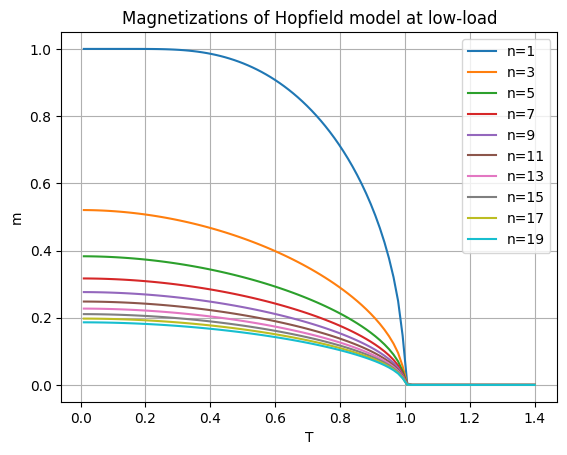

In [ ]:
#Solution of SC-equation for the Hopfield model in low-load regime
#It takes approx. 3 minutes!

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#parameters
T = np.linspace(0.01,1.4,100)
n_values = [1,3,5,7,9,11,13,15,17,19]

def integrand_m(z,b,m_n,n):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2) * np.tanh(b * m_n + b * m_n * z * np.sqrt(n-1))

def Hop_LLR_selfcons(b,n):
    maxiter = 1000
    w = 1
    m_init = np.sqrt(2 / (n *np.pi))
    m = m_init
    for ii in range(1, maxiter + 1):
        m_n, _ = quad(integrand_m, -8, 8,args=(b, m, n), limit=250)
        if np.abs(m - m_n) < 1e-10:
            break

        m = (m_n + m * w) / (1 + w)
    mvalue = m
    return mvalue

solution_m = np.zeros((len(T),len(n_values)))

for n in range(len(n_values)):
  for t in range(len(T)):
    solution_m[t,n] = Hop_LLR_selfcons(1/T[t],n_values[n])

for n in range(len(n_values)):
  plt.plot(T,solution_m[:,n],label=f'n={n_values[n]}')

plt.xlabel('T')
plt.ylabel('m')
plt.legend()
plt.grid(True)
plt.title("Magnetizations of Hopfield model at low-load")

Text(0.5, 1.0, 'Free energies of Hopfield model at low-load')

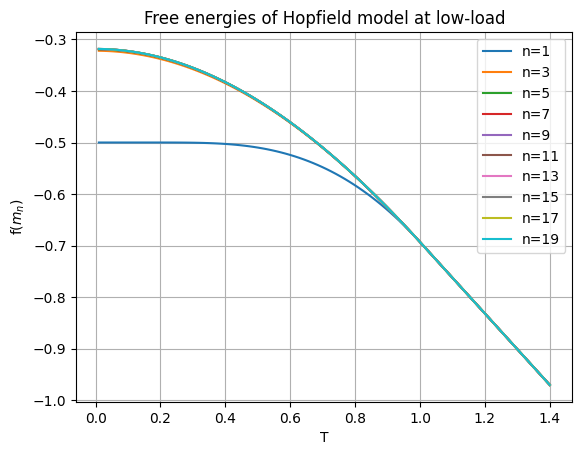

In [ ]:
def integrand_f(z,b,m_n,n):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2) * np.log(2*np.cosh(b * m_n + b * m_n * z * np.sqrt(n-1)))

def free_energy_Hop_LLR(m,b,n):
    integral, _ = quad(integrand_f, -8, 8,args=(m,b,n), limit=100)
    return ((np.sqrt(n)*m)**2)/2 - (1/b) * integral

T = np.linspace(0.01,1.4,100)

solution_f = np.zeros((len(T),len(n_values)))
for n in range(len(n_values)):
  for t in range(len(T)):
    solution_f[t,n] = free_energy_Hop_LLR(solution_m[t,n],1/T[t],n_values[n])

for n in range(len(n_values)):
  plt.plot(T,solution_f[:,n],label=f'n={n_values[n]}')

plt.xlabel('T')
plt.ylabel('f($m_n$)')
plt.legend()
plt.grid(True)
plt.title("Free energies of Hopfield model at low-load")

---
**HIGH-LOAD REGIME**

In this section, we will analyse the model in the case of  \emph{High-load}, where $P \propto N$ and
\begin{equation}
	\alpha :=  \lim_{N \to \infty} \dfrac{P}{N}  > 0.
\end{equation}
One possible approach is to use the so-called \textbf{Replica trick}. This method uses the following identity
\begin{equation*}
	\log(x) = \lim_{n \to 0} \dfrac{x^{n}-1}{n}
\end{equation*}
in order to calculate the quenched pressure
\begin{equation}
	A_{\beta}^{Q} = - \beta f_{\beta}^{Q} = \lim_{N \to \infty} \lim_{n \to 0} \dfrac{\mathbb{E} Z_{N,\beta,J}^{n} - 1}{Nn}.
\end{equation}
The trick is to consider distinct replicas $\sigma^{(a)}$,$\sigma^{(b)}$ that have the same initial distribution. This leads us to introduce the new order parameter called **overlap**
\begin{equation}
	q_{ab} = \dfrac{1}{N} \sum_{i=1}^{N} \sigma_{i}^{(a)} \sigma_{i}^{(b)}
\end{equation}
which measures the correlation between the two replicas. This method is very efficient for solving the *Sherrington-Kirkpatrick model*, however it is more complicated to apply it to the Hopfield model.
An alternative and much more sophisticated approach is the so-called **Intepolation technique**. The main idea is to introduce an interpolating pressure $A_{N}(t)$ that recovers the original model for $t = 1$, while for $t = 0$ it corresponds to the pressure of a simpler model analytically addressable. Then, the expression for $A_{N}(t)$ is obtained by exploiting the fundamental theorem of calculus
\begin{equation}
	A_{N,\beta}^{Q} = A_{N}(1) = A_{N}(0) + \int_{0}^{1} \frac{d}{dt} \ A_{N}(t') \ dt' .
\end{equation}
The resolution is based on two starting assumptions. The first consists of the so-called *Replica Symmetry Ansatz*, in which it is assumed that $q_{ab} = q \ \forall a \neq b$. The second, consists of considering the patterns in the following way: the target pattern $\xi^{1}$ is a Rademarcher pattern, while all others $\{\xi^{\mu} \}_{\mu = 2...P}$ are distributed as a standard Gaussian.



*Theorem*:

In the TDL and under RS assumption, the quenched statistical pressure of the Hopfiel model is
\begin{equation}
\begin{split}
    A_{\beta, \alpha} (m,q,r ) &= - \dfrac{\beta}{2} m^{2}  + \log 2 - \dfrac{\alpha \beta}{2} - \beta \alpha \overline{r} (1 - \overline{q}) + \dfrac{\beta \alpha \overline{q}}{2 (1 - \beta (1 - \overline{q})) } \\
    &\quad - \dfrac{\alpha}{2} \log(1 - \beta (1 - \overline{q})) + \mathbb{E} \left[ \log 2\cosh (\beta \overline{m} + J \sqrt{\beta \alpha \overline{r}}) \right]
\end{split}
\end{equation}
where $\overline{m}, \overline{q}, \overline{r}$ fulfill the conditions
\begin{equation*}
    \left\{
    \begin{aligned}
         \overline{q} &= \mathbb{E} \left[ \tanh^{2} ( \beta  \overline{m} +  J \sqrt{\beta \alpha \overline{r}}) \right] \\
         \overline{m} &= \mathbb{E} \left[ \tanh ( \beta  \overline{m} +  J \sqrt{\beta \alpha \overline{r}}) \right]    \\
         \overline{r} &= \dfrac{\beta \overline{q}}{(1 - \beta(1 - \overline{q}))^{2}}
     \end{aligned}
    \right.
\end{equation*}
In conclusion, the free energy of the system is given by $f_{\beta, \alpha}(m,q) = - \frac{A_{\beta, \alpha}(m,q)}{\beta}$ and the extremality conditions are
\begin{equation}
	m = \int d \mu(z) \mathbb{E} \left\{ \xi \tanh \left[ \beta \left( m \cdot \xi + \dfrac{\sqrt{\alpha q}}{ 1 - \beta (1-q)} z \right) \right] \right\}
\end{equation}
\begin{equation}
	q = \int d \mu(z) \mathbb{E} \left\{ \xi \tanh^{2} \left[ \beta \left( m \cdot \xi + \dfrac{\sqrt{\alpha q}}{ 1 - \beta (1-q)} z \right) \right] \right\} .
\end{equation}


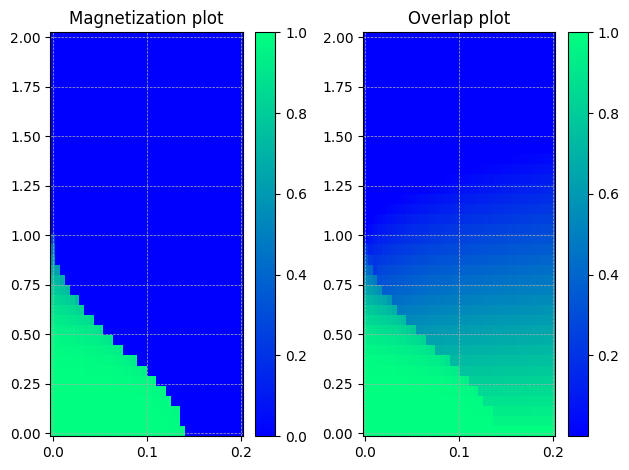

In [ ]:
#Solution of SC-equation for the Hopfield model in high-load regime
#It takes approx. 5 minutes!

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def integrand_m(z, a, b, m, p):
   return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2) * np.tanh(b * m + np.sqrt(b * a * p) * z)

def integrand_q(z, a, b, m, p):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2) * np.tanh(b * m + np.sqrt(b * a * p) * z)**2

def H_selfcons_RS(b, a):
    maxiter = 1000
    w = 1
    q = 1.0
    m = 1.0
    for ii in range(1, maxiter + 1):
        p = b * q / (1 - b * (1 - q))**2
        m_n, _ = quad(integrand_m, -8, 8,args=(a, b, m, p), limit=250)
        q_n, _ = quad(integrand_q, -8, 8,args=(a, b, m, p), limit=250)

        if np.abs(q - q_n) + np.abs(m - m_n) < 1e-5:
            break

        m = (m_n + m * w) / (1 + w)
        q = (q_n + q * w) / (1 + w)

    qvalue = q
    mvalue = m
    return qvalue, mvalue

T = np.linspace(0.01, 2, 40)
A = np.linspace(0, 0.2, 40)
mm = np.zeros((len(T), len(A)))
qq = np.zeros((len(T), len(A)))

for i, t in enumerate(T):
    for j, a in enumerate(A):
        qvalue, mvalue = H_selfcons_RS(1/t, a)
        mm[i, j] = mvalue
        qq[i, j] = qvalue

plt.subplot(1, 2, 1)
plt.pcolormesh(A, T, mm, cmap='winter')
plt.colorbar()
plt.grid(True, linestyle='dashed', linewidth=0.5)
plt.title('Magnetization plot')
plt.subplot(1, 2, 2)
plt.pcolormesh(A, T, qq, cmap='winter')
plt.colorbar()
plt.grid(True, linestyle='dashed', linewidth=0.5)
plt.title('Overlap plot')
plt.tight_layout()
plt.show()


---
# Audio Retrieval
We import the **Dataset** from [Github](https://github.com/msilver22/Hopfield_model). The dataset consists of audio samples in which the numbers 0 to 80 were recorded

In [2]:
import os
import librosa

url_repository = 'https://github.com/msilver22/Hopfield_model.git'
nome_cartella_locale = 'Hopfield_model'
!git clone $url_repository $nome_cartella_locale
cartella_dataset = os.path.join(nome_cartella_locale, 'dataset')
files_wav = sorted([f for f in os.listdir(cartella_dataset) if f.endswith('.wav')])

Cloning into 'Hopfield_model'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 175 (delta 16), reused 0 (delta 0), pack-reused 118
Receiving objects: 100% (175/175), 10.02 MiB | 10.35 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
print('The dataset contains',len(files_wav),'audio samples.')

The dataset contains 81 audio samples.


In [3]:
import numpy as np

def fft_signal(audio_path):
    audio, sr = librosa.load(audio_path)
    stft_signal = librosa.stft(audio, n_fft=1024, hop_length=512)
    stft_coeff = np.mean(stft_signal, axis=1)

    return audio, sr,  stft_signal, stft_coeff

In [4]:
def audio_importation():
  audio_objects = []
  for file_wav in files_wav:
        path = os.path.join(cartella_dataset, file_wav)
        audio, sr, stft_signal, stft_coeff = fft_signal(path)
        audio_object = {'audio': audio, 'sr': sr, 'stft_signal': stft_signal, 'stft_coeff': stft_coeff}
        audio_objects.append(audio_object)
  return audio_objects

In [5]:
dataset = audio_importation()

This is the real data audio.


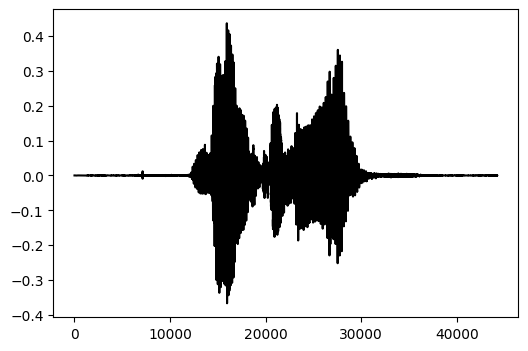

 
The dimensions of the Fourier transform matrix are ( 513 , 87 ).
Each row corresponds to a time instant.
The following graph shows the vector of Fourier coefficients averaged over the rows.


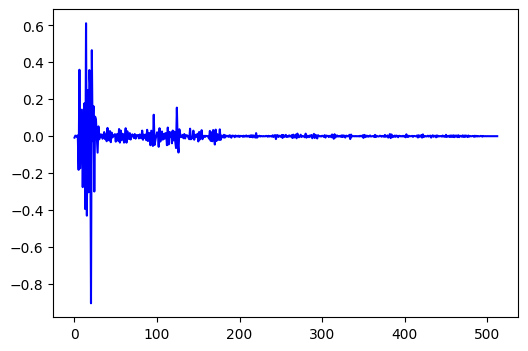

In [6]:
import matplotlib.pyplot as plt

print("This is the real data audio.")
real_signal = dataset[22]['audio']
plt.figure(figsize=(6, 4))
plt.plot(np.real(real_signal),color='black')
plt.show()
print(" ")
stft_signal = dataset[22]['stft_signal']
print("The dimensions of the Fourier transform matrix are (",len(stft_signal),",",len(stft_signal[0]),").")
stft_coeff = dataset[22]['stft_coeff']
print("Each row corresponds to a time instant.")

print("The following graph shows the vector of Fourier coefficients averaged over the rows.")
plt.figure(figsize=(6, 4))
plt.plot(np.real(stft_coeff), color='blue')
plt.show()

We can reproduce the audio using the inverse transform applied to the coefficient matrix.

In [7]:
from IPython.display import Audio
signal = librosa.istft(stft_signal, hop_length=512)
Audio(signal, rate=dataset[22]['sr'])

Since our model works with vectors with values in $\pm 1$, we perform a binarization of the previous vector using a treshold 0.

In [8]:
def audio_binarization(stft_coeff):
    binary = (stft_coeff > 0).astype(int)
    binary = 2*binary - 1

    return binary

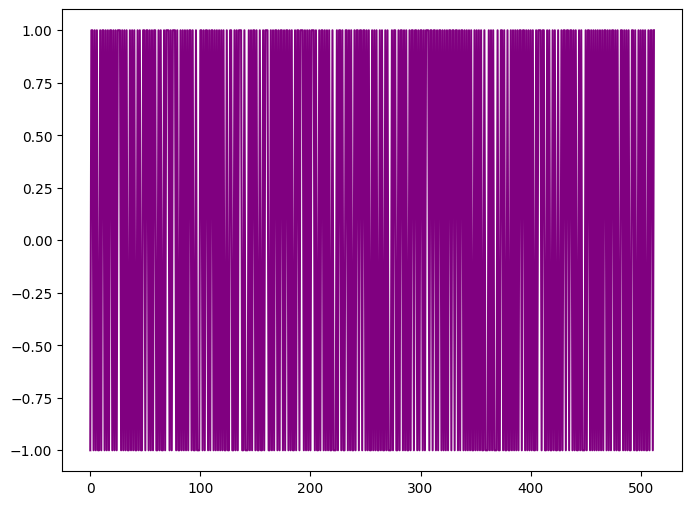

In [9]:
σ = audio_binarization(stft_coeff)
plt.figure(figsize=(8, 6))
plt.plot(σ,color='purple')
plt.show()

We therefore construct the matrix of binary patterns. Notice that they are clearly non-orthogonal and have almost 50 per cent of the same components as all other patterns.

In [10]:
patterns_bin = np.zeros((81,len(stft_coeff)))
for i in range(0,81):
   ξi = audio_binarization(dataset[i]['stft_coeff'])
   patterns_bin[i,:] = ξi

np.shape(patterns_bin)

(81, 513)

In [11]:
ξ1 = patterns_bin[22,:]
ξ2 = patterns_bin[12,:]
dot_product = np.dot(ξ1,ξ2)
print(dot_product)

29.0


Text(0.5, 1.0, 'Correlations between patterns wrt 22')

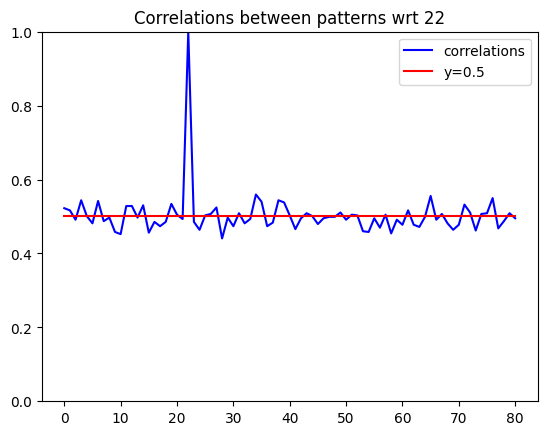

In [ ]:
def pattern_similarity(patterns, pattern_test):
        iter = patterns.shape[0]
        comparisons = np.zeros(iter)
        for i in range(iter):
            correct_components = sum(x == y for x, y in zip(patterns[i, :], pattern_test))
            similarity = correct_components / len(pattern_test)
            comparisons[i] = similarity
        prediction = np.argmax(comparisons)
        return prediction,comparisons

_ , corr = pattern_similarity(patterns_bin,patterns_bin[22,:])
xvalues = np.arange(81)
plt.ylim(0,1)
plt.plot(xvalues,corr,color='blue',label='correlations')
plt.plot(xvalues, np.full(81, 0.5), color='red',label='y=0.5')
plt.legend()
plt.title("Correlations between patterns wrt 22")

Let's define the model.

In [14]:
from tqdm import tqdm
import random

class HopfieldNetwork(object):
    def train_weights(self, train_data):
        self.num_neuron = train_data.shape[1]
        self.num_patterns = train_data.shape[0]
        self.patterns = train_data

        J = np.zeros((self.num_neuron, self.num_neuron))

        # Hebbian rule
        for i in range(0,self.num_neuron):
            for j in range(i + 1, self.num_neuron):
                for mu in range(0, self.num_patterns):
                    J[i, j] += train_data[mu, i] * train_data[mu, j]

        J = (J + J.T) / self.num_neuron
        self.J = J

    def predict(self, test_data, temperature):
        sigma = test_data.copy().T
        sigma = sigma.T
        #parameters
        N=self.num_neuron
        K=self.num_patterns
        alpha = K/N
        T = temperature
        beta = 1.0 / T
        MCstat_step=50
        MCrelax_step=1
        # Inizialize the magnetization
        magn_mattis_matrix = np.zeros((self.num_patterns,MCstat_step))

        #MONTECARLO simulations
        for stat in range(0, MCstat_step):
            for step in range(0,MCrelax_step):
                #montecarlo step
                for i in range(0,N):
                    k = np.random.randint(0, N)  #flipping candidate
                    deltaE=2*sigma[k]*np.dot(sigma,self.J[:,k]) #if deltaE<0 always accept
                    ratio=np.exp(-beta*deltaE)
                    gamma=np.minimum(ratio,1)
                    if np.any(random.uniform(0,1) < gamma):
                        sigma[k] = -sigma[k]  #flipping
            for mu in range(0,self.num_patterns):
                magn_mattis_matrix[mu,stat]= np.dot(sigma,self.patterns[mu,:])/N

        predicted = sigma
        return predicted,magn_mattis_matrix

    def predict_roughWay(self,test_data): #NOT USED
        print("Start to predict...")
        s = test_data.copy()
        #PARALLEL DYNAMICS
        """for i in range(0,2):
            s = np.sign(self.J @ s)   """
        #SEQUENTIAL DYNAMICS
        num_iter=10*self.num_neuron
        magn_mattis_matrix = np.zeros((self.num_patterns,num_iter))
        for i in range(num_iter):
            k = np.random.randint(0, self.num_neuron)
            s[k] = np.sign(np.dot(self.J[k,:],s))
            for mu in range(0,self.num_patterns):
                magn_mattis_matrix[mu,i]= np.dot(s,self.patterns[mu,:])/self.num_neuron

        return s, magn_mattis_matrix



    def get_corrupted(self, pattern,r):
        sample_size = int(self.num_neuron*r)
        I = np.random.choice(len(pattern),size = sample_size, replace=False)
        corrupted = pattern.copy()
        for i in range(len(I)):
            corrupted[I[i]] = -1*corrupted[I[i]]

        return corrupted


Retrieval of one pattern choosen randomly.

In [16]:
model = HopfieldNetwork()
model.train_weights(patterns_bin)

In [ ]:
print("Start to create corrupted file-test...")
rand_test = np.random.choice(range(model.num_patterns))
#critical randomness > 0.4
randomness = 0.3
print("We randomly choose to corrupt pattern = number",rand_test, "with randomness =", randomness)
test = patterns_bin[rand_test,:]
#Corruption
test_corrupted = model.get_corrupted(test,randomness)

Start to create corrupted file-test...
We randomly choose to corrupt pattern = number 60 with randomness = 0.3


Text(0.5, 1.0, 'Verification of corruption wrt number 60 with r=0.3')

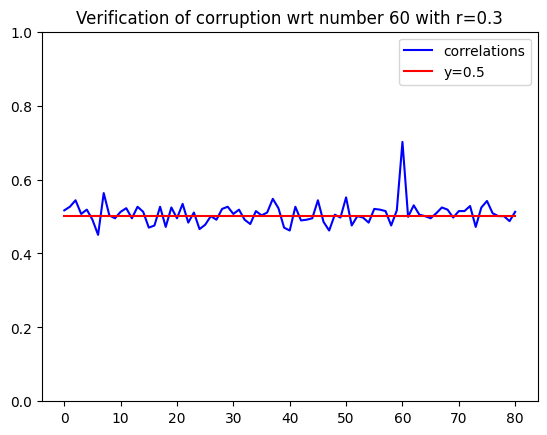

In [ ]:
_,corr = pattern_similarity(patterns_bin,test_corrupted)
xvalues = np.arange(81)
plt.ylim(0,1)
plt.plot(xvalues,corr,color='blue',label='correlations')
plt.plot(xvalues, np.full(81, 0.5), color='red',label = 'y=0.5')
plt.legend()
plt.title(f"Verification of corruption wrt number {rand_test} with r={randomness}")

The corrupted pattern matches the number 35 and the correct result is 60


Text(0.5, 1.0, 'Mattis magnetization wrt target pattern')

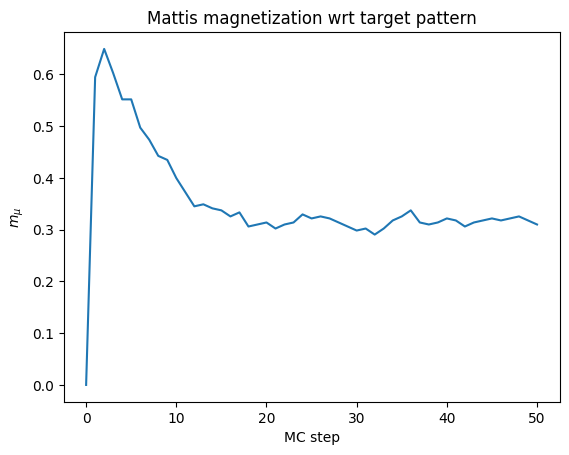

In [ ]:
#Prediction
predicted1,magnetization1 = model.predict(test_corrupted,temperature=0.1)
result,_ = pattern_similarity(patterns_bin,predicted1)
print("The corrupted pattern matches the number", result, "and the correct result is",
      rand_test)
x = np.arange(0,len(magnetization1[rand_test,:])+1)
plt.plot(x,np.insert(magnetization1[rand_test,:], 0, 0),label="Mattis magnetization")
plt.xlabel("MC step")
plt.ylabel(r"$m_{\mu}$")
plt.title("Mattis magnetization wrt target pattern")

In [ ]:
#Reproducing original audio
stft_signal = dataset[rand_test]['stft_signal']
signal = librosa.istft(stft_signal, hop_length=512)
Audio(signal, rate=dataset[rand_test]['sr'])

In [ ]:
#Reproducing corrupted audio
signal_corrupted = np.zeros_like(stft_signal)
for i in range(signal_corrupted.shape[0]):
    if (test[i] != test_corrupted[i]):
        signal_corrupted[i,:] = (stft_signal[i,:]*(-1))**2
    else: signal_corrupted[i,:] = stft_signal[i,:]
audio_corrupted = librosa.istft(signal_corrupted, hop_length=512)
Audio(audio_corrupted, rate=dataset[rand_test]['sr'])

In [ ]:
#Reproducing predicted audio
signal_predicted = np.zeros_like(stft_signal)
for i in range(signal_predicted.shape[0]):
    if (test[i] != predicted1[i]):
        signal_predicted[i,:] = (stft_signal[i,:]*(-1))**2
    else: signal_predicted[i,:] = stft_signal[i,:]
audio_predicted = librosa.istft(signal_predicted, hop_length=512)
Audio(audio_predicted, rate=dataset[rand_test]['sr'])

The results are bad because the model has already reached a load that is excessive in relation to the number of neurons that make up the network. Let us analyse the Phase Diagram.

100%|██████████| 80/80 [1:11:37<00:00, 53.72s/it]


Text(0.5, 1.0, 'Phase Diagram')

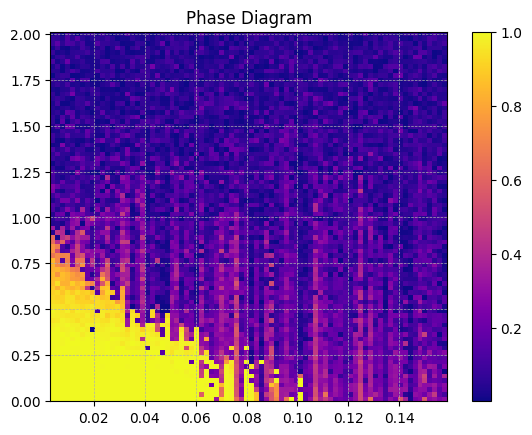

In [ ]:
#Colourplot of the magnetization as T and the load vary
#It takes approx. 1h and 40 minutes!


num_patterns = 81
I = np.arange(81)
np.random.shuffle(I)
I_new = I.copy()
patterns_bin_total_list = []

for iter in range(2, num_patterns+1):
    binary_list=[]
    patterns_bin = np.zeros((iter,len(dataset[0]['stft_coeff'])))
    for i in range(0,iter):
        stft_coeff = dataset[I_new[i]]['stft_coeff']
        binary = audio_binarization(stft_coeff)
        patterns_bin[i,:] = binary

    patterns_bin_total_list.append(patterns_bin)

T = T = np.linspace(0.01, 2, 80)
A = np.zeros(80)
for i in range(0,80):
    A[i] = (i+2)/513

magns = np.zeros((len(T),len(A)))

for iter in tqdm(range(0,num_patterns-1)):
    model.train_weights(patterns_bin_total_list[iter])
    rand_test = np.random.choice(range(model.num_patterns))
    randomness = 0.3
    test = patterns_bin[rand_test,:]
    test_corrupted = model.get_corrupted(test,randomness)
    #Predictions
    for t in range(0,len(T)) :
        predicted,magnetization = model.predict(test_corrupted, temperature=T[t])
        magns[t,iter] = np.abs(magnetization[rand_test,-1])


plt.pcolormesh(A, T, magns, cmap='plasma')
plt.colorbar()
plt.grid(True, linestyle='dashed', linewidth=0.5)
plt.title('Phase Diagram')

The Phase Diagram tells us that, if $r = 0.3$, the maximum network load for good performance is $0.06$.

In [17]:
print(81/513)
P = 0.06 * model.num_neuron
print(P)

0.15789473684210525
30.779999999999998


So, now let's test the trained model again only on $30$ (random) patterns

In [ ]:
I = np.arange(81)
np.random.shuffle(I)
I_new = I[0:29]
rand_index = np.random.randint(len(I_new))
rand_test = I_new[rand_index]
patterns_bin_new = patterns_bin[I_new,:]
model.train_weights(patterns_bin_new)
print(I_new)
print(rand_test)
print(rand_index)

[80 61 54 57 20 74 26  5 65 19 11  6 55  7  0 49 69 23 14 13 77 21 58 44
  1 63 51 73 18]
26
6


In [ ]:
randomness = 0.3
print("We randomly choose to corrupt pattern = number",rand_test, "with randomness =", randomness)
test = patterns_bin[rand_test,:]
test_corrupted = model.get_corrupted(test,randomness)

We randomly choose to corrupt pattern = number 26 with randomness = 0.3


The corrupted pattern matches the number 26 and the correct result is 26


Text(0.5, 1.0, 'Mattis magnetization wrt target pattern')

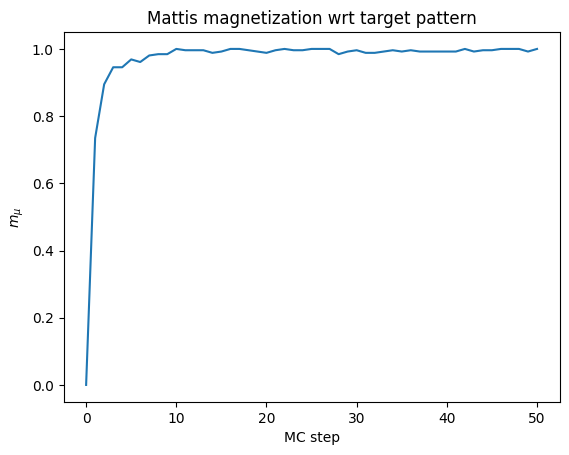

In [ ]:
predicted,magnetization = model.predict(test_corrupted,temperature=0.2)
result,_ = pattern_similarity(patterns_bin_new,predicted)
print("The corrupted pattern matches the number", I_new[result], "and the correct result is",
      rand_test)
x = np.arange(0,len(magnetization[rand_index,:])+1)
plt.plot(x,np.insert(magnetization[rand_index,:], 0, 0),label="Mattis magnetization")
plt.xlabel("MC step")
plt.ylabel(r"$m_{\mu}$")
plt.title("Mattis magnetization wrt target pattern")

Reproducing audios.

In [ ]:
#Reproducing original audio
stft_signal = dataset[rand_test]['stft_signal']
signal = librosa.istft(stft_signal, hop_length=512)
Audio(signal, rate=dataset[rand_test]['sr'])

In [ ]:
#Reproducing corrupted audio
signal_corrupted = np.zeros_like(stft_signal)
for i in range(signal_corrupted.shape[0]):
    if (test[i] != test_corrupted[i]):
        signal_corrupted[i,:] = (stft_signal[i,:]*(-1))**2
    else: signal_corrupted[i,:] = stft_signal[i,:]
audio_corrupted = librosa.istft(signal_corrupted, hop_length=512)
Audio(audio_corrupted, rate=dataset[rand_test]['sr'])

In [ ]:
#Reproducing predicted audio
signal_predicted = np.zeros_like(stft_signal)
for i in range(signal_predicted.shape[0]):
    if (test[i] != predicted[i]):
        signal_predicted[i,:] = (stft_signal[i,:]*(-1))**2
    else: signal_predicted[i,:] = stft_signal[i,:]
audio_predicted = librosa.istft(signal_predicted, hop_length=512)
Audio(audio_predicted, rate=dataset[rand_test]['sr'])